In [1]:
'''
타이타닉 생존자 machine learning 예측구현

데이터 전처리
Null 처리
불필요한 속성제거
인코딩

Model 학습/검증/예측/평가

결정트리, 랜덤포레스트, 로지스틱 회귀학습 비교

K Fold 교차 검증

cross_val_score()
GridSearchCV
'''

'\n타이타닉 생존자 machine learning 예측구현\n\n데이터 전처리\nNull 처리\n불필요한 속성제거\n인코딩\n\nModel 학습/검증/예측/평가\n\n결정트리, 랜덤포레스트, 로지스틱 회귀학습 비교\n\nK Fold 교차 검증\n\ncross_val_score()\nGridSearchCV\n'

In [43]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv("titanic_train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print("\n -- titanic train dataset 정보 --")
print(titanic_df.info())


 -- titanic train dataset 정보 --
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Cabin"].fillna("N", inplace=True)
titanic_df["Embarked"].fillna("N", inplace=True)
print("titanic train dataset 정보")
print(titanic_df.info())

titanic train dataset 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
print("컬럼별로 확인하기 :\n",titanic_df.isnull().sum(),sep="")
print("전체합계 확인하기 :\n",titanic_df.isnull().sum().sum(),sep="")

컬럼별로 확인하기 :
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
전체합계 확인하기 :
0


In [10]:
print("Sex 컬럼의 값 분포 :\n", titanic_df["Sex"].value_counts(),sep="")
print("\nCabin 컬럼의 값 분포 :\n", titanic_df["Cabin"].value_counts(),sep="")
print("\nEmbarked 컬럼의 값 분포 :\n", titanic_df["Embarked"].value_counts(),sep="")

Sex 컬럼의 값 분포 :
male      577
female    314
Name: Sex, dtype: int64

Cabin 컬럼의 값 분포 :
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

Embarked 컬럼의 값 분포 :
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [17]:
titanic_df["Cabin"] = titanic_df["Cabin"].str[:1]
print(titanic_df["Cabin"].head())
print(titanic_df["Cabin"].value_counts())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [16]:
titanic_df.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

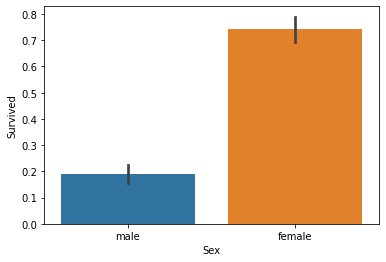

In [18]:
sns.barplot(x = "Sex", y = "Survived", data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

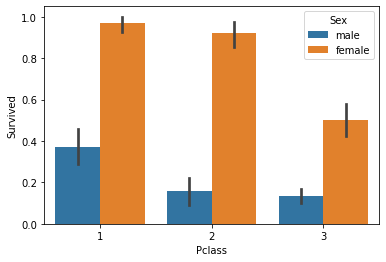

In [20]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=titanic_df)

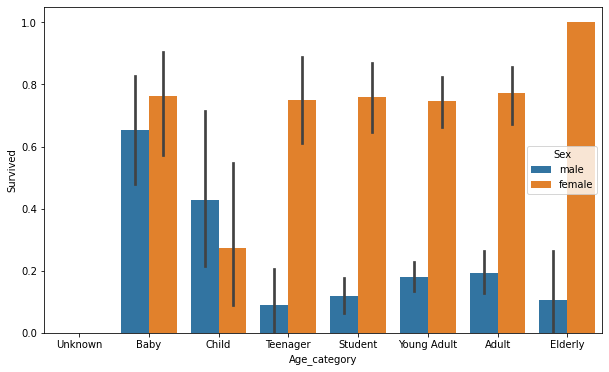

In [22]:
#입력하는 age 값에 따라서 다른 문자열을 반환하게 함
# DataFrame 의 apply lambda 식에서 이 함수를 호출함

def get_age_category(age):
    category = ""
    if age <= -1: category = "Unknown"
    elif age <= 5: category = "Baby"
    elif age <= 12: category = "Child"
    elif age <= 18: category = "Teenager"
    elif age <= 25: category = "Student"
    elif age <= 35: category = "Young Adult"
    elif age <= 60: category = "Adult"
    else: category = "Elderly"
    return category

#막대그래프의 크기 feature를 더 크게 하기
plt.figure(figsize=(10,6))

# X 축 값(이름)을 저장하는 리스트
group_names = \
 ["Unknown","Baby", "Child", "Teenager", "Student", "Young Adult", "Adult", "Elderly"]

# lambda 식의 return 값으로 get_age_category(age)를 지정함
titanic_df["Age_category"] = \
  titanic_df["Age"].apply(lambda age : get_age_category(age))

#막대그래프 설정하기
sns.barplot(x="Age_category", y="Survived", hue="Sex",data=titanic_df, order=group_names)

# column 삭제하기
titanic_df.drop("Age_category", axis=1, inplace=True)

### LabelEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder

def encode_features(data_frame):
    features = ["Cabin","Sex","Embarked"]
    for feature in features:
        encoder = LabelEncoder()
        encoder = encoder.fit(data_frame[feature])
        data_frame[feature] = encoder.transform(data_frame[feature])
    return data_frame
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [31]:
from sklearn.preprocessing import LabelEncoder

# Null 값을 처리하는 함수
def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna("N", inplace=True)
    df["Embarked"].fillna("N", inplace=True)
    return df

# ML 알고리즘 적용시 불필요한 속성을 제거하는 함수
def drop_features(df):
    df.drop(["PassengerId","Name","Ticket"], axis=1, inplace=True)
    return df

# LabelEncoding을 수행하는 함수
def format_features(df):
    df["Cabin"] = df["Cabin"].str[:1]
    features = ["Cabin", "Sex", "Embarked"]
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 위에 정의한 함수들을 호출하는 함수
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [53]:
#원본 dataset 를 로딩하고 
# feature dataset 와 Label dataset 추출하기

titanic_df = pd.read_csv("titanic_train.csv")

# titanic_df 에서 Survived column 만 추출하고
y_titanic_df = titanic_df["Survived"]

# titanic_df 에서 Survived column 을 제거함
X_titanic_df = titanic_df.drop("Survived", axis=1)

# Survived column 이 제거된 titanic_df를 전처리함
X_titanic_df = transform_features(X_titanic_df)


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정 트리, 랜텀포레스트, 로지스틱 회귀기법을 사용하기 위해서
# 해당 클래스의 객체 생성하기
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

### DesicionTreeclassifier 학습/예측/평가

In [56]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_result = accuracy_score(y_test, dt_pred)

print(f"DecisionTreeClassifier 정확도: {accuracy_result}")

DecisionTreeClassifier 정확도: 0.7877094972067039


2.2 RandomForestClassifier 학습/예측/평가

In [60]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f"RandomForestClassifier 정확도 : {accuracy_score(y_test, rf_pred):.4f}")

RandomForestClassifier 정확도 : 0.8547


#### LogisticRegression 학습/예측/평가

In [62]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f"LogisticRegression 정확도 : {accuracy_score(y_test, lr_pred) :.4f}")

LogisticRegression 정확도 : 0.8492


In [63]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
accuracy_result = accuracy_score(y_test, dt_pred)

print(f"DecisionTreeClassfier 정확도 : {accuracy_result}")

DecisionTreeClassfier 정확도 : 0.7877094972067039


KFold 교차검증

In [76]:
from sklearn.model_selection import KFold

# folds=5 : fold set이 5개
# exex_kfold() 함수 안에서 fold set이 5개인 KFold 객체를 생성함
# 예측 결과(accuracy)를 저장할 리스트를 fold set 개수 크기로 생성함
def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행하기
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        
        # X_titanic_df 데이터 세트에서 교차검증별로
        # 학습데이터세트와 테스트데이터세트의 index 생성하기
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
       
        # Classifier(분류)  학습/예측/평가 수행하기
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print(f"교차 검증 {iter_count+1} 번째 정확도 : {accuracy:4f}")
        
     # 5개 fold 에서의 평균 정확도
    mean_score = np.mean(scores)
    print(f"평균 정확도 : {mean_score:.4f}")

exec_kfold(dt_clf, folds=5)

교차 검증 1 번째 정확도 : 0.754190
교차 검증 2 번째 정확도 : 0.780899
교차 검증 3 번째 정확도 : 0.786517
교차 검증 4 번째 정확도 : 0.769663
교차 검증 5 번째 정확도 : 0.820225
평균 정확도 : 0.7823


#### cross_val_score() 함수 사용하기

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

for iter_count, accuracy in enumerate(scores):
    print(f"교차검증 {iter_count+1}번째 정확도:{accuracy:.4f}")

print(f"교차검증 평균 정확도 : {np.mean(scores):.4f}")

교차검증 1번째 정확도:0.7430
교차검증 2번째 정확도:0.7753
교차검증 3번째 정확도:0.7921
교차검증 4번째 정확도:0.7865
교차검증 5번째 정확도:0.8427
교차검증 평균 정확도 : 0.7879


#### GridSearchCV

In [83]:
from sklearn.model_selection import GridSearchCV
'''
min_samples_split : node 분할을 위한 최소한의 샘플 데이터 개수 - 과적합을 제어함
                    이 개수가 적을 수록 과적합이 될 가능성이 증가함
min_sample_leaf   : leaf node 가 되기 위한 최소한의 샘플 데이터 개수
                    이 개수가 적을수록 과적합을 잘 제어할 수 있음
max_features      : 최적분할을 위한 최대한의 feature 개수
                    - 기본값은 None이고, 이는 모든 feature 를 고려한다는 의미
max_depth          : 최대깊이 - 기본값은 None이고, None은 완전히 분할될 때까지
                                                   분할한다는 의미
                                (또는 leaf node 최소 샘플까지 분할한다는 의미)
'''

parameters = {
              "max_depth":[2,3,5,0],
              "min_samples_split":[2,3,5],
              "min_samples_leaf":[1,5,8]
              }

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring="accuracy", cv=5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 hyper parameter :", grid_dclf.best_params_,sep="")
print(f"GridSearchCV 최고정확도 : {grid_dclf.best_score_}")

# GridSearchCV 의 최적 hyper parameter 로 학습된
# Estimator 로 예측 /평가 수행하기
best_dclf = grid_dclf.best_estimator_
pred = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f"테스트 데이터 세트에서 DecisionTreeClassifier 정확도 : {accuracy:.4f}")

GridSearchCV 최적 hyper parameter :{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고정확도 : 0.7991825076332119
테스트 데이터 세트에서 DecisionTreeClassifier 정확도 : 0.8715
